In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import quad, dblquad

In [2]:
X=[-11.38,-35.4,1.6,2.7,5.3,-3.8,-3.7,-9.8,2.5,5]

N=1000
y=np.linspace(0,40,N)
len(y)

1000

In [3]:
#para normalizar la funcion

def mult(y,X):
    A=1.0
    for i in range(len(X)):
        A=A*(y/(2*np.pi))*(1/(y**2+X[i]**2))
    return A

funcion=lambda y: mult(y,X)
Norm=quad(funcion,y[0],y[-1])[0]

fun=lambda y: mult(y,X)/Norm
quad(fun,y[0],y[-1])[0]

1.0000003466120262

In [4]:
def func(y,X,N):
    
    A=np.ones(N)
    
    for j in range(N):
        b=1.0
    
        for i in range(len(X)):
            b=b*(y[j]/(y[j]**2+X[i]**2))/(2*np.pi)
            
        A[j]=b
        
    return A/Norm

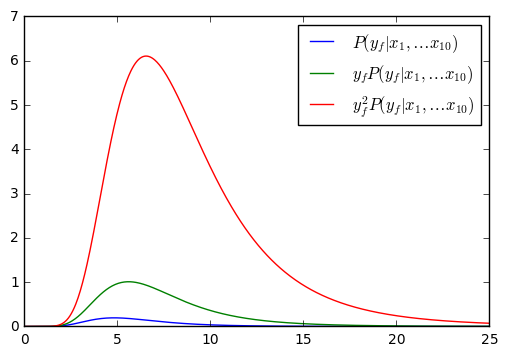

In [5]:

Tot=func(y,X,N)
Tot1=mult(y,X)
Y=y*Tot
Y2=y*y*Tot
plt.plot(y,Tot,label="$ P(y_f|x_1,\dotsx_{10}) $")
plt.plot(y,Y,label="$ y_fP(y_f|x_1,\dotsx_{10}) $")
plt.plot(y,Y2,label="$ y_f^2P(y_f|x_1,\dotsx_{10}) $")
plt.xlim(0,25)
plt.legend()
plt.savefig("punto2_distribuciones.png")
plt.show()
plt.close()

# Integrando, Hallando los valores medios

In [6]:
funy1=lambda y: y*mult(y,X)/Norm
funy2=lambda y: y*y*mult(y,X)/Norm
valy=quad(funy1,y[0],np.inf)
valy2=quad(funy2,y[0],np.inf)
print(valy,valy2)




((6.2114039720523095, 6.444898394714471e-08), (45.781467556462175, 1.819349969193901e-07))


# Incertidumbre de Y: $ \sigma_y= \langle y^2 \rangle -\langle y \rangle^2$

In [7]:
np.sqrt(valy2[0]-valy[0]**2)

2.6832682035970548

# valor optimo de y


In [8]:
funcm=max(Tot)
MY=0
for i in range(len(Tot)):
    if(Tot[i]==funcm):
        MY=y[i]
        print(y[i])
line_y=np.linspace(min(Tot),max(Tot),100)
line_x=np.ones(100)*MY

4.84484484484


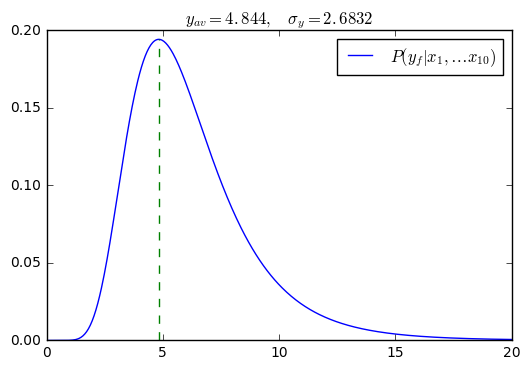

In [9]:
plt.plot(y,Tot,label="$ P(y_f|x_1,\dotsx_{10}) $")
plt.plot(line_x,line_y,"--")
plt.xlim(0,20)
plt.title("$ y_{av}=4.844, \quad \sigma_y=2.6832  $")
plt.legend()
plt.savefig("punto2_valores.png")
plt.show()